# Load and see how detectron 2 looks on our data 

from https://pubs.acs.org/doi/10.1021/acs.est.3c00593

## install first!

In [1]:
# If you're in JupyterLab, prefer %pip so it installs into the kernel env.
# 1) Install PyTorch first (choose ONE line that matches your CUDA, or CPU)
# Example CUDA 11.8:
%pip install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# CPU-only:
# %pip install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

# 2) Install detectron2 from source (most robust across torch versions)
%pip install -U 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 14.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 38.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 62.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 73.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 51.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 49.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 44.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 56.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 59.4 MB/s eta 0:

In [1]:
import torch
import detectron2
print("torch:", torch.__version__)
print("cuda available:", torch.cuda.is_available())
print("detectron2:", detectron2.__version__)

torch: 2.7.1+cu118
cuda available: False
detectron2: 0.6


In [3]:
import torch

model_path = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20260123_detectron2_masks/config/model_final.pth"
ckpt = torch.load(model_path, map_location="cpu")

type(ckpt), ckpt.keys()

(dict, dict_keys(['model', 'trainer', 'iteration']))

In [4]:
import torch, re

model_path = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20260123_detectron2_masks/config/model_final.pth"
ckpt = torch.load(model_path, map_location="cpu")
state = ckpt["model"]

# quick “fingerprints”
keys = list(state.keys())

print("Has ROI heads:", any(k.startswith("roi_heads.") for k in keys))
print("Has mask head:", any("roi_heads.mask_head" in k for k in keys))
print("Has RPN:", any(k.startswith("proposal_generator.") for k in keys))
print("Has RetinaNet head:", any(k.startswith("retinanet.") for k in keys))

# show a few top keys
for k in keys[:30]:
    print(k)

Has ROI heads: True
Has mask head: True
Has RPN: True
Has RetinaNet head: False
backbone.fpn_lateral2.weight
backbone.fpn_lateral2.bias
backbone.fpn_output2.weight
backbone.fpn_output2.bias
backbone.fpn_lateral3.weight
backbone.fpn_lateral3.bias
backbone.fpn_output3.weight
backbone.fpn_output3.bias
backbone.fpn_lateral4.weight
backbone.fpn_lateral4.bias
backbone.fpn_output4.weight
backbone.fpn_output4.bias
backbone.fpn_lateral5.weight
backbone.fpn_lateral5.bias
backbone.fpn_output5.weight
backbone.fpn_output5.bias
backbone.bottom_up.stem.conv1.weight
backbone.bottom_up.stem.conv1.norm.weight
backbone.bottom_up.stem.conv1.norm.bias
backbone.bottom_up.stem.conv1.norm.running_mean
backbone.bottom_up.stem.conv1.norm.running_var
backbone.bottom_up.res2.0.shortcut.weight
backbone.bottom_up.res2.0.shortcut.norm.weight
backbone.bottom_up.res2.0.shortcut.norm.bias
backbone.bottom_up.res2.0.shortcut.norm.running_mean
backbone.bottom_up.res2.0.shortcut.norm.running_var
backbone.bottom_up.res2.0.c

In [1]:
import torch, re

model_path = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20260123_detectron2_masks/config/model_final.pth"
ckpt = torch.load(model_path, map_location="cpu")
state = ckpt["model"]

# Box classifier weight is shaped (num_classes + 1, in_features)
cls_key = [k for k in state.keys() if k.endswith("roi_heads.box_predictor.cls_score.weight")][0]
num_classes = state[cls_key].shape[0] - 1
print("Inferred NUM_CLASSES =", num_classes)

# sanity: mask predictor should match num_classes too
mask_key = [k for k in state.keys() if k.endswith("roi_heads.mask_head.predictor.weight")][0]
print("Mask predictor out channels =", state[mask_key].shape[0])

Inferred NUM_CLASSES = 16
Mask predictor out channels = 16


In [2]:
import os
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor

# 1) Absolute weights path (truth)
model_path = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20260123_detectron2_masks/config/model_final.pth"
assert os.path.isfile(model_path), f"Missing weights: {model_path}"

# 2) Config: load your yaml, then set weights explicitly
cfg = get_cfg()
cfg.merge_from_file("/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20260123_detectron2_masks/config/config.yaml")
cfg.MODEL.WEIGHTS = model_path  # <- do NOT use cfg.OUTPUT_DIR here
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # tweak as needed

predictor = DefaultPredictor(cfg)
print("Using weights:", cfg.MODEL.WEIGHTS)
print("Device:", cfg.MODEL.DEVICE)

# 3) Input images path (folder of images, or a single image)
img_dir = "results/mcolon/20260123_detectron2_masks/test_images"

# 4) Output path for results
out_dir = "results/mcolon/20260123_detectron2_masks/inference"
os.makedirs(out_dir, exist_ok=True)

results_csv = os.path.join(out_dir, "results.csv")
print("Will write:", results_csv)

AssertionError: Config file '/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20260123_detectron2_masks/config/config.yaml' does not exist!

Found 7 images in /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20260123_detectron2_masks/test_images


[W123 21:04:45.425596665 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W123 21:04:45.831061464 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W123 21:04:45.009052664 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W123 21:04:46.226928664 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W123 21:04:46.720989708 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W123 21:04:46.982589248 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W123 21:04:47.580802696 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W123 21:04:47.083899048 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W123 21:04:48.453791144 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W123 21:04:48.801474551 NNPACK.cpp:57] Could not initialize NNPACK! Reason: Unsupported hardware.
[W123 21:0

Saved overlays to: /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20260123_detectron2_masks/inference_viz


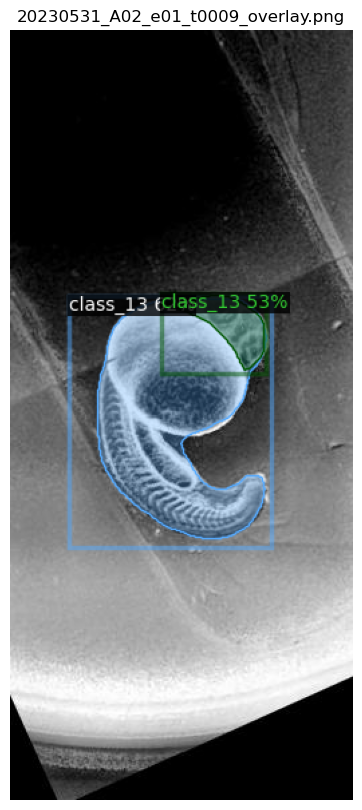

In [2]:
import os, glob
import cv2
import torch
import matplotlib.pyplot as plt

from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog

# -----------------------
# Paths
# -----------------------
model_path = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20260123_detectron2_masks/config/model_final.pth"
test_dir  = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20260123_detectron2_masks/test_images"
out_dir   = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20260123_detectron2_masks/inference_viz"
os.makedirs(out_dir, exist_ok=True)

# -----------------------
# Build cfg (Mask R-CNN R50-FPN base)
# -----------------------
NUM_CLASSES = 16

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
))
cfg.MODEL.ROI_HEADS.NUM_CLASSES = NUM_CLASSES
cfg.MODEL.WEIGHTS = model_path
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # tweak threshold
predictor = DefaultPredictor(cfg)

# -----------------------
# Metadata (optional, but helps legend labeling)
# If you don't know class names, use placeholders
# -----------------------
class_names = [f"class_{i}" for i in range(NUM_CLASSES)]
metadata = MetadataCatalog.get("my_dataset_infer")
metadata.set(thing_classes=class_names)

# -----------------------
# Collect images
# -----------------------
exts = ("*.png","*.jpg","*.jpeg","*.tif","*.tiff","*.bmp")
img_paths = []
for e in exts:
    img_paths.extend(glob.glob(os.path.join(test_dir, e)))
img_paths = sorted(img_paths)

print(f"Found {len(img_paths)} images in {test_dir}")
assert len(img_paths) > 0, "No images found. Check test_dir and extensions."

# -----------------------
# Run inference + save visualizations
# -----------------------
for p in img_paths:
    img_bgr = cv2.imread(p, cv2.IMREAD_UNCHANGED)
    if img_bgr is None:
        print("Skipping unreadable:", p)
        continue

    # Normalize common microscopy cases: grayscale or RGBA -> 3-channel BGR uint8
    if img_bgr.ndim == 2:
        img_bgr = cv2.cvtColor(img_bgr, cv2.COLOR_GRAY2BGR)
    elif img_bgr.shape[2] == 4:
        img_bgr = img_bgr[:, :, :3]

    if img_bgr.dtype == "uint16":
        img_bgr = (img_bgr / 256).astype("uint8")

    outputs = predictor(img_bgr)
    instances = outputs["instances"].to("cpu")

    # Visualize
    v = Visualizer(
        img_bgr[:, :, ::-1],  # to RGB
        metadata=metadata,
        scale=1.0,
        instance_mode=ColorMode.IMAGE_BW
    )
    vis = v.draw_instance_predictions(instances)
    vis_rgb = vis.get_image()

    base = os.path.splitext(os.path.basename(p))[0]
    out_path = os.path.join(out_dir, f"{base}_overlay.png")
    cv2.imwrite(out_path, vis_rgb[:, :, ::-1])  # back to BGR for cv2

print("Saved overlays to:", out_dir)

# Show the first overlay inline
first_overlay = sorted(glob.glob(os.path.join(out_dir, "*_overlay.png")))[0]
img_show = cv2.imread(first_overlay)
plt.figure(figsize=(10,10))
plt.imshow(img_show[:, :, ::-1])
plt.axis("off")
plt.title(os.path.basename(first_overlay))
plt.show()